In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Conv2D, UpSampling2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D, Dropout, ReLU, LeakyReLU, Flatten

from keras.datasets import cifar10, mnist, fashion_mnist

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
(X_train, Y_train), (X_test,Y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 7s 0us/step


In [3]:
X_train = X_train/255.0
X_test = X_test/255.0

X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

### 1. Flattened Autoencoder

Flatten each image to a vector and train it on autoencoder.

In [4]:
X_train_flatten = X_train.reshape(X_train.shape[0],np.product(X_train.shape[1:]))
X_test_flatten = X_test.reshape(X_test.shape[0],np.product(X_test.shape[1:]))
X_train_flatten.shape, X_test_flatten.shape

((50000, 3072), (10000, 3072))

In [5]:
model = Sequential()

model.add(Dense(1024,activation="relu",input_shape=X_train_flatten.shape[1:]))
model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(1024,activation="relu"))
model.add(Dense(X_train_flatten.shape[1],activation="sigmoid"))

model.compile(loss="mse", optimizer="adam",metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_6 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              525312    
__________

In [6]:
hist = model.fit(X_train_flatten,X_train_flatten, validation_split=0.2,
                epochs=20, batch_size=16)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 18s 448us/step - loss: 0.0313 - acc: 0.0025 - val_loss: 0.0287 - val_acc: 0.0030
Epoch 2/20
40000/40000 [==============================] - 16s 389us/step - loss: 0.0247 - acc: 0.0033 - val_loss: 0.0244 - val_acc: 0.0042
Epoch 3/20
40000/40000 [==============================] - 15s 386us/step - loss: 0.0227 - acc: 0.0039 - val_loss: 0.0220 - val_acc: 0.0041
Epoch 4/20
40000/40000 [==============================] - 16s 389us/step - loss: 0.0216 - acc: 0.0034 - val_loss: 0.0210 - val_acc: 0.0032
Epoch 5/20
40000/40000 [==============================] - 15s 386us/step - loss: 0.0206 - acc: 0.0034 - val_loss: 0.0205 - val_acc: 0.0029
Epoch 6/20
40000/40000 [==============================] - 16s 390us/step - loss: 0.0204 - acc: 0.0035 - val_loss: 0.0202 - val_acc: 0.0048
Epoch 7/20
40000/40000 [==============================] - 15s 386us/step - loss: 0.0200 - acc: 0.0045 - val_loss: 0.

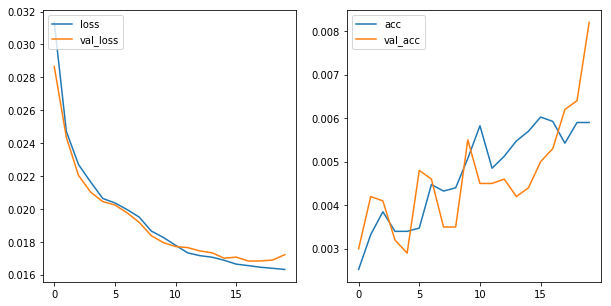

In [7]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(hist.history["loss"], label="loss")
plt.plot(hist.history["val_loss"], label="val_loss")
plt.legend(loc="upper left")

plt.subplot(1,2,2)
plt.plot(hist.history["acc"], label="acc")
plt.plot(hist.history["val_acc"], label="val_acc")
plt.legend(loc="upper left")

plt.show()

In [8]:
X_test_pred = model.predict(X_test_flatten)
X_test_pred = X_test_pred.reshape(X_test.shape)

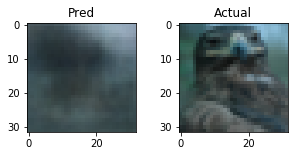

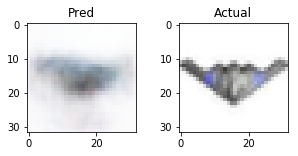

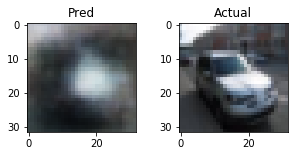

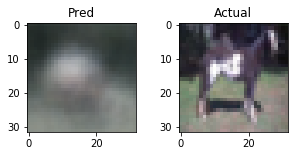

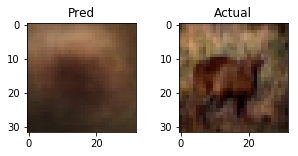

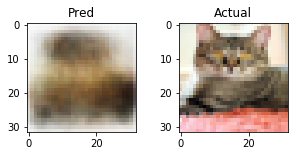

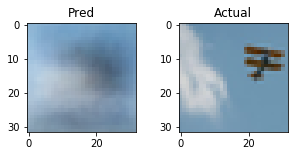

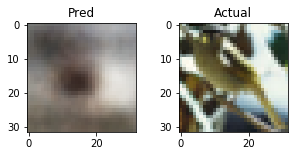

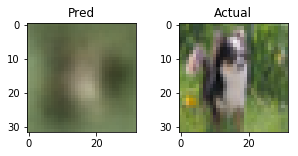

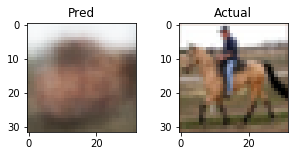

In [9]:
n_print = 10
idx = np.random.permutation(np.arange(len(X_test_flatten)))[:n_print]

for i in idx:
    plt.figure(figsize=(5,2))
    
    plt.subplot(1,2,1)
    plt.imshow(X_test_pred[i])
    plt.title("Pred")
    
    plt.subplot(1,2,2)
    plt.imshow(X_test[i])
    plt.title("Actual")
    plt.show()
    

### 2. 2D Autoencoder

In [10]:
model = Sequential()
model.add(Conv2D(32,3,padding="same",activation="relu",input_shape=X_train.shape[1:]))
model.add(MaxPool2D(padding="same"))

model.add(Conv2D(128,3,padding="same",activation="relu"))
model.add(MaxPool2D(padding="same"))

model.add(Conv2D(512,3,padding="same",activation="relu"))
model.add(MaxPool2D(padding="same"))
model.add(Conv2D(512,3,padding="same",activation="relu"))

model.add(Conv2D(512,3,padding="same",activation="relu"))
model.add(UpSampling2D(2))
model.add(Conv2D(128,3,padding="same",activation="relu"))
model.add(UpSampling2D(2))
model.add(Conv2D(32,3,padding="same",activation="relu"))
model.add(UpSampling2D(2))
model.add(Conv2D(3,3,padding="same",activation="relu"))

model.compile(loss="mse",optimizer="adam",metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       36992     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 512)         590336    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 512)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 512)         2359808   
__________

In [11]:
hist = model.fit(X_train, X_train, validation_split=0.2,
                epochs=20, batch_size=16)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 31s 768us/step - loss: 0.0132 - acc: 0.6922 - val_loss: 0.0078 - val_acc: 0.7543
Epoch 2/20
40000/40000 [==============================] - 29s 719us/step - loss: 0.0068 - acc: 0.7511 - val_loss: 0.0060 - val_acc: 0.7389
Epoch 3/20
40000/40000 [==============================] - 29s 719us/step - loss: 0.0056 - acc: 0.7621 - val_loss: 0.0049 - val_acc: 0.7727
Epoch 4/20
40000/40000 [==============================] - 29s 718us/step - loss: 0.0049 - acc: 0.7707 - val_loss: 0.0045 - val_acc: 0.7896
Epoch 5/20
40000/40000 [==============================] - 29s 718us/step - loss: 0.0045 - acc: 0.7762 - val_loss: 0.0042 - val_acc: 0.7892
Epoch 6/20
40000/40000 [==============================] - 29s 719us/step - loss: 0.0042 - acc: 0.7807 - val_loss: 0.0039 - val_acc: 0.7964
Epoch 7/20
40000/40000 [==============================] - 29s 717us/step - loss: 0.0040 - acc: 0.7833 - val_loss: 0.

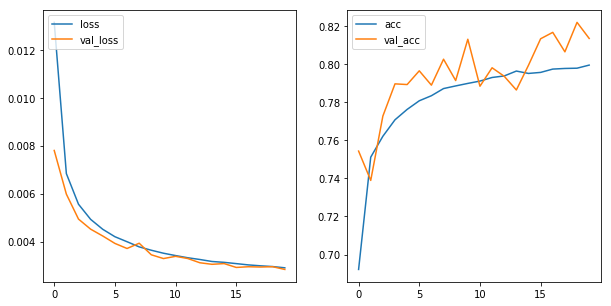

In [12]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(hist.history["loss"], label="loss")
plt.plot(hist.history["val_loss"], label="val_loss")
plt.legend(loc="upper left")

plt.subplot(1,2,2)
plt.plot(hist.history["acc"], label="acc")
plt.plot(hist.history["val_acc"], label="val_acc")
plt.legend(loc="upper left")

plt.show()

In [13]:
X_test_pred = model.predict(X_test)
#X_test_pred = model.predict(np.random.uniform(0,1, size=(10,32,32,3)))

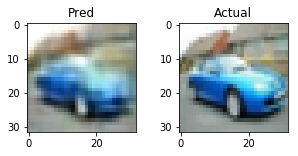

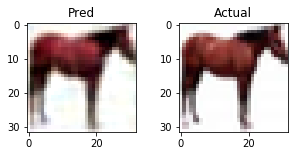

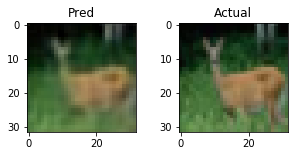

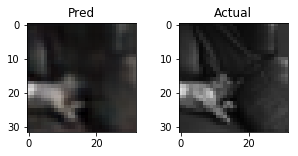

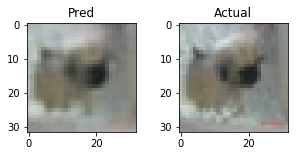

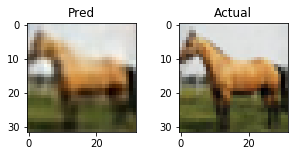

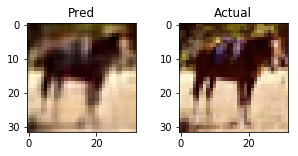

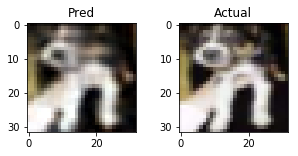

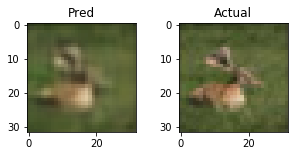

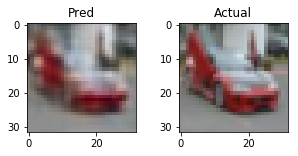

In [14]:
n_print = 10
idx = np.random.permutation(np.arange(len(X_test_pred)))[:n_print]

for i in idx:
    plt.figure(figsize=(5,2))
    
    plt.subplot(1,2,1)
    plt.imshow(X_test_pred[i])
    plt.title("Pred")
    
    plt.subplot(1,2,2)
    plt.imshow(X_test[i])
    plt.title("Actual")
    plt.show()
    